In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['RedditNews.csv', 'Combined_News_DJIA.csv', 'DJIA_table.csv']


In [2]:
data = pd.read_csv('../input/DJIA_table.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
Date         1989 non-null object
Open         1989 non-null float64
High         1989 non-null float64
Low          1989 non-null float64
Close        1989 non-null float64
Volume       1989 non-null int64
Adj Close    1989 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [4]:
data.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [5]:
data.tail ()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


In [6]:
print(type('Date')) # As you can see date is string
# however we want it to be datetime object
datetime_object = pd.to_datetime(data.Date)
print(datetime_object)

<class 'str'>
0      2016-07-01
1      2016-06-30
2      2016-06-29
3      2016-06-28
4      2016-06-27
5      2016-06-24
6      2016-06-23
7      2016-06-22
8      2016-06-21
9      2016-06-20
10     2016-06-17
11     2016-06-16
12     2016-06-15
13     2016-06-14
14     2016-06-13
15     2016-06-10
16     2016-06-09
17     2016-06-08
18     2016-06-07
19     2016-06-06
20     2016-06-03
21     2016-06-02
22     2016-06-01
23     2016-05-31
24     2016-05-27
25     2016-05-26
26     2016-05-25
27     2016-05-24
28     2016-05-23
29     2016-05-20
          ...    
1959   2008-09-19
1960   2008-09-18
1961   2008-09-17
1962   2008-09-16
1963   2008-09-15
1964   2008-09-12
1965   2008-09-11
1966   2008-09-10
1967   2008-09-09
1968   2008-09-08
1969   2008-09-05
1970   2008-09-04
1971   2008-09-03
1972   2008-09-02
1973   2008-08-29
1974   2008-08-28
1975   2008-08-27
1976   2008-08-26
1977   2008-08-25
1978   2008-08-22
1979   2008-08-21
1980   2008-08-20
1981   2008-08-19
1982   2008-08

In [7]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [8]:
data["new_date"] = datetime_object
# lets make date as index
data2 = data.set_index("new_date")
data2 

,Date,Open,High,Low,Close,Volume,Adj Close
new_date,,,,,,,
2016-07-01,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
2016-06-24,2016-06-24,17946.630859,17946.630859,17356.339844,17400.750000,239000000,17400.750000
2016-06-23,2016-06-23,17844.109375,18011.070312,17844.109375,18011.070312,98070000,18011.070312
2016-06-22,2016-06-22,17832.669922,17920.160156,17770.359375,17780.830078,89440000,17780.830078
2016-06-21,2016-06-21,17827.330078,17877.839844,17799.800781,17829.730469,85130000,17829.730469


In [9]:
print(data2.loc["2008-08-08"])

                  Date          Open      ...          Volume     Adj Close
new_date                                  ...                              
2008-08-08  2008-08-08  11432.089844      ...       212830000  11734.320312

[1 rows x 7 columns]


In [10]:
databy_year = data2.resample("A").mean() # in order to see the mean of years

In [11]:
databy_year.head ()

,Open,High,Low,Close,Volume,Adj Close
new_date,,,,,,
2008-12-31,9747.967048,9923.360598,9537.701892,9723.478110,2.886362e+08,9723.478110
2009-12-31,8877.986506,8960.406822,8799.038997,8885.654698,2.800537e+08,8885.654698
2010-12-31,10662.866102,10728.239432,10590.241544,10668.583457,2.017934e+08,10668.583457
2011-12-31,11953.786757,12042.081310,11863.480267,11957.570003,1.804133e+08,11957.570003
2012-12-31,12960.269895,13024.289187,12895.343531,12965.313441,1.312606e+08,12965.313441


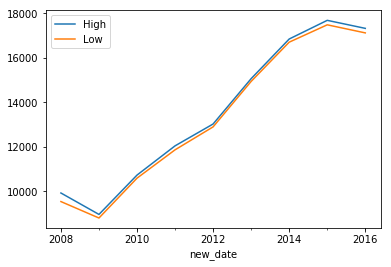

In [12]:
data1 = databy_year.loc[:,["High","Low"]] # line plot of the mean of the years
data1.plot()


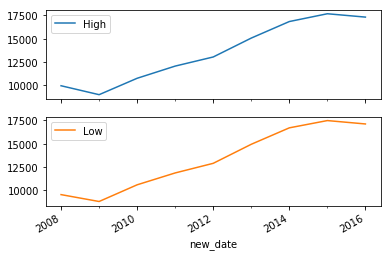

In [13]:
data1.plot(subplots = True)
plt.show()

In [14]:
databy_month = data2.resample("M").mean()

In [15]:
databy_month.head ()

,Open,High,Low,Close,Volume,Adj Close
new_date,,,,,,
2008-08-31,11542.535095,11640.489990,11442.662475,11552.021118,1.608500e+08,11552.021118
2008-09-30,11146.173875,11307.396717,10947.943452,11114.082450,3.001110e+08,11114.082450
2008-10-31,9241.511273,9503.376486,8909.623429,9176.714398,3.613730e+08,9176.714398
2008-11-30,8637.606779,8836.177297,8402.898951,8614.554148,3.296253e+08,8614.554148
2008-12-31,8596.598677,8731.419167,8442.820912,8595.557262,2.591759e+08,8595.557262


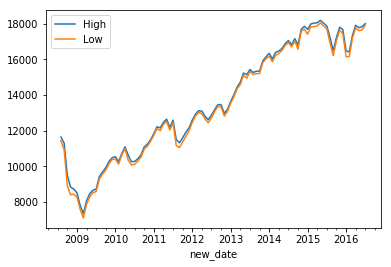

In [16]:
data3 = databy_month.loc[:,["High","Low"]]  # line plot of the mean of the months
data3.plot()
